#Data Loading#

##Import Library

In [17]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

## Import Dataset

In [18]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train (1).csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,

In [19]:
# Check dataset
house = pd.read_csv('/content/train.csv')
house

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

* There are 1.460 rows in the dataset.
* There are 81 columns in the dataset.
* In this case, a linear regression model will be applied to predict house prices based on floor area and the number of bedrooms and bathrooms.
* Based on the columns above, the following are columns related to square footage and the number of bedrooms and bathrooms:
`LotFrontage`, `LotArea`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch` `ScreenPorch`, `PoolArea`, `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `BedroomAbvGr`, and `SalePrice` as a target variable.

In [20]:
# display the desired columns
desired_column = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'BsmtFullBath', 'BsmtHalfBath',
    'FullBath', 'HalfBath', 'BedroomAbvGr', 'SalePrice'
]

# select only the desired columns
house_option = house[desired_column]

house_option

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0            65.0     8450       196.0         706           0        150   
1            80.0     9600         0.0         978           0        284   
2            68.0    11250       162.0         486           0        434   
3            60.0     9550         0.0         216           0        540   
4            84.0    14260       350.0         655           0        490   
...           ...      ...         ...         ...         ...        ...   
1455         62.0     7917         0.0           0           0        953   
1456         85.0    13175       119.0         790         163        589   
1457         66.0     9042         0.0         275           0        877   
1458         68.0     9717         0.0          49        1029          0   
1459         75.0     9937         0.0         830         290        136   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  EnclosedPorch  \
0             856       856       854             0  ...              0   
1            1262      1262         0             0  ...              0   
2             920       920       866             0  ...              0   
3             756       961       756             0  ...            272   
4            1145      1145      1053             0  ...              0   
...           ...       ...       ...           ...  ...            ...   
1455          953       953       694             0  ...              0   
1456         1542      2073         0             0  ...              0   
1457         1152      1188      1152             0  ...              0   
1458         1078      1078         0             0  ...            112   
1459         1256      1256         0             0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0             0            0         0             1             0         2   
1             0            0         0             0             1         2   
2             0            0         0             1             0         2   
3             0            0         0             1             0         1   
4             0            0         0             1             0         2   
...         ...          ...       ...           ...           ...       ...   
1455          0            0         0             0             0         2   
1456          0            0         0             1             0         2   
1457          0            0         0             0             0         2   
1458          0            0         0             1             0         1   
1459          0            0         0             1             0         1   

      HalfBath  BedroomAbvGr  SalePrice  
0            1             3     208500  
1            0             3     181500  
2            1             3     223500  
3            0             3     140000  
4            1             4     250000  
...        ...           ...        ...  
1455         1             3     175000  
1456         0             3     210000  
1457         0             4     266500  
1458         0             2     142125  
1459         1             3     147500  

[1460 rows x 24 columns]

Now there are only 24 columns

# Exploratory Data Analysis (EDA)

The variables in the House Prices - Advanced Regression Techniques are as follows:
* `LotFrontage`: Linear feet of street connected to property
* `LotArea`: Lot size in square feet
* `MasVnrArea`: Masonry veneer type
* `BsmtFinSF1`: Type 1 finished square feet
* `BsmtFinSF2`: Type 2 finished square feet
* `BsmtUnfSF`: Unfinished square feet of basement area
* `TotalBsmtSF`: Total square feet of basement area
* `1stFlrSF`: First Floor square feet
* `2ndFlrSF`: Second floor square feet
* `LowQualFinSF`: Low quality finished square feet (all floors)
* `GrLivArea`: Above grade (ground) living area square feet
* `GarageArea`: Size of garage in square feet
* `WoodDeckSF`: Wood deck area in square feet
* `OpenPorchSF`: Open porch area in square feet
* `EnclosedPorch`: Enclosed porch area in square feet
* `3SsnPorch`: Three season porch area in square feet
* `ScreenPorch`: Screen porch area in square feet
* `PoolArea`: Pool area in square feet
* `BsmtFullBath`: Basement full bathrooms
* `BsmtHalfBath`: Basement half bathrooms
* `FullBath`: Full bathrooms above grade
* `HalfBath`: Half baths above grade
* `Bedroom`: Number of bedrooms above basement level
* `SalePrice`: The property's sale price in dollars

In [21]:
house_option.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  PoolArea       1460 non-null   int64  
 18  BsmtFull

From the output, it can be seen that:

* The dataset consists of 1.460 rows and 24 columns.
* There are missing values in several columns, including `LotFrontage` and `MasVnrArea`

In [22]:
house_option.describe()

LotFrontage        LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1201.000000    1460.000000  1452.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082   103.685262   443.639726    46.549315   
std      24.284752    9981.264932   181.066207   456.098091   161.319273   
min      21.000000    1300.000000     0.000000     0.000000     0.000000   
25%      59.000000    7553.500000     0.000000     0.000000     0.000000   
50%      69.000000    9478.500000     0.000000   383.500000     0.000000   
75%      80.000000   11601.500000   166.000000   712.250000     0.000000   
max     313.000000  215245.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521  ...   
std     441.866955   438.705324   386.587738   436.528436     48.623081  ...   
min       0.000000     0.000000   334.000000     0.000000      0.000000  ...   
25%     223.000000   795.750000   882.000000     0.000000      0.000000  ...   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000  ...   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000  ...   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000  ...   

       EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  BsmtFullBath  \
count    1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean       21.954110     3.409589    15.060959     2.758904      0.425342   
std        61.119149    29.317331    55.757415    40.177307      0.518911   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     0.000000      0.000000   
50%         0.000000     0.000000     0.000000     0.000000      0.000000   
75%         0.000000     0.000000     0.000000     0.000000      1.000000   
max       552.000000   508.000000   480.000000   738.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr      SalePrice  
count   1460.000000  1460.000000  1460.000000   1460.000000    1460.000000  
mean       0.057534     1.565068     0.382877      2.866438  180921.195890  
std        0.238753     0.550916     0.502885      0.815778   79442.502883  
min        0.000000     0.000000     0.000000      0.000000   34900.000000  
25%        0.000000     1.000000     0.000000      2.000000  129975.000000  
50%        0.000000     2.000000     0.000000      3.000000  163000.000000  
75%        0.000000     2.000000     1.000000      3.000000  214000.000000  
max        2.000000     3.000000     2.000000      8.000000  755000.000000  

[8 rows x 24 columns]

From the results of the describe() function, the minimum values for the several columns are 0. This indicates that there are some features that are not present in the house.

## Univariate Analysis

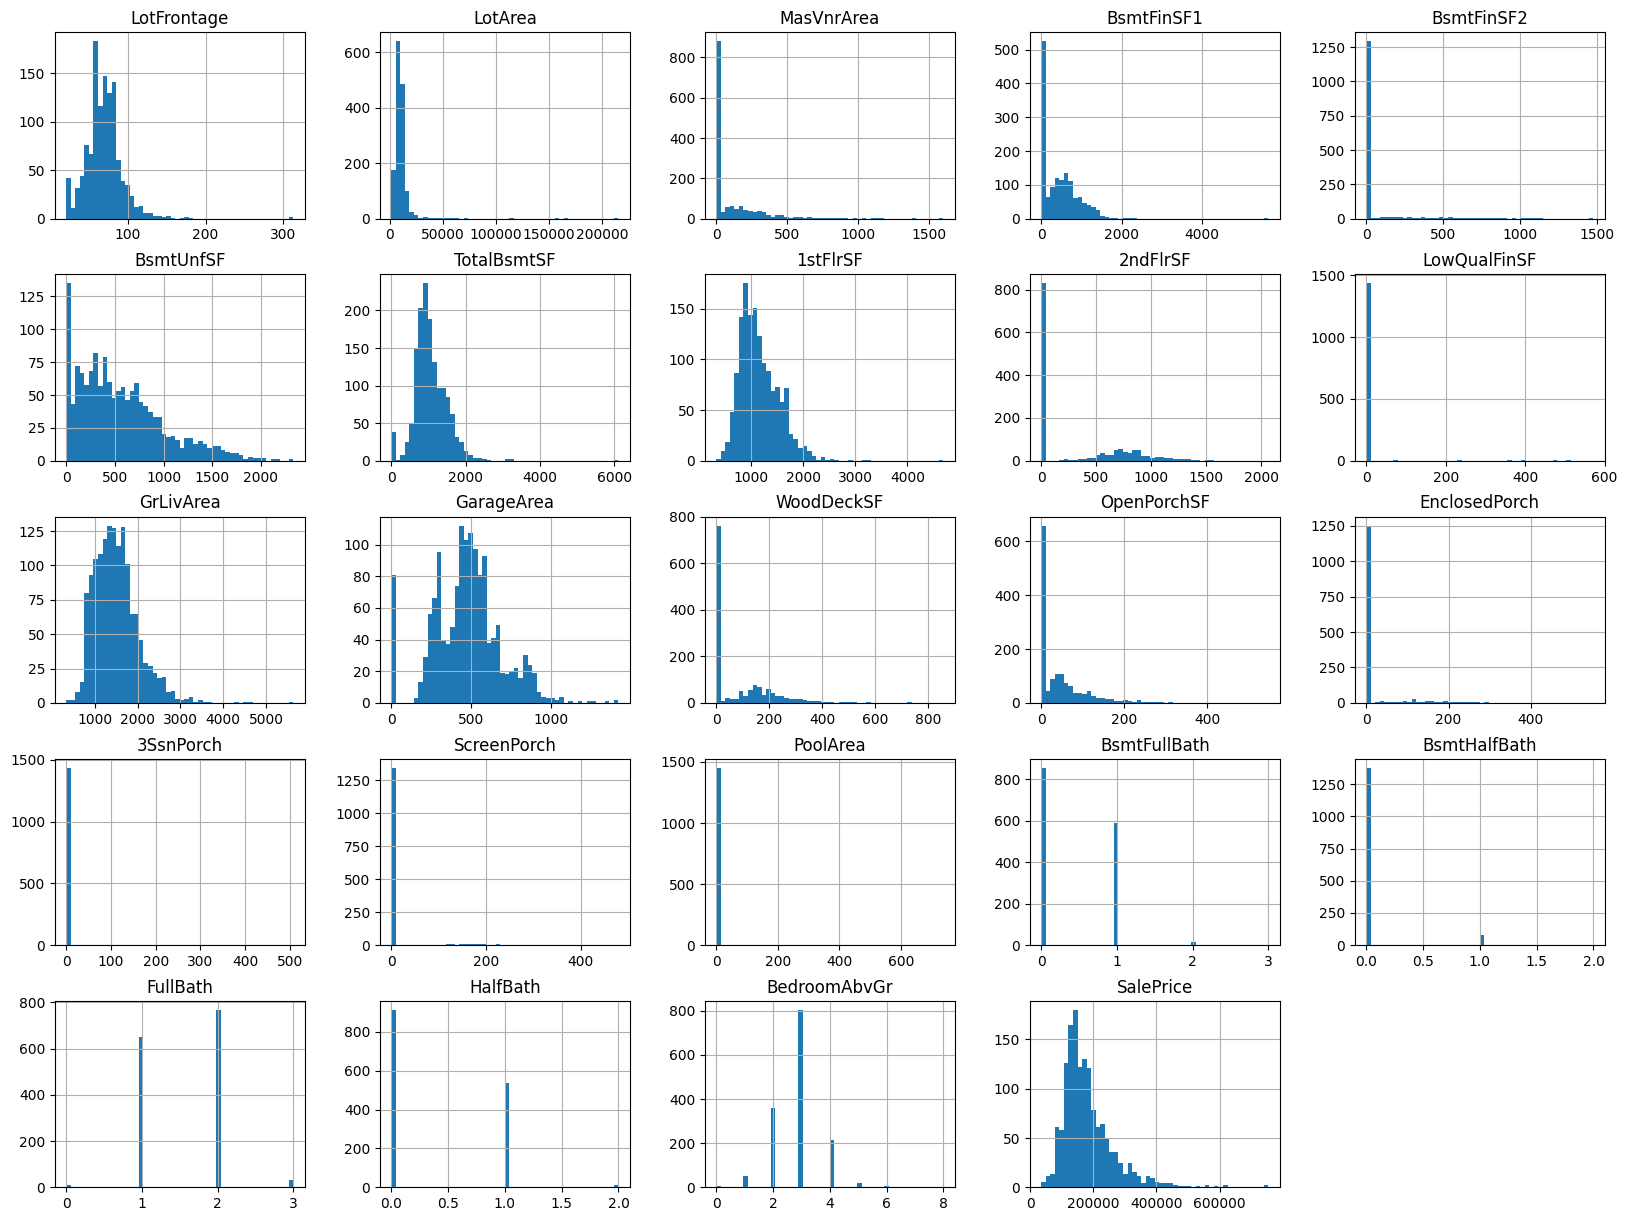

In [23]:
# analysis of the number of unique values in each numerical feature
house_option.hist(bins=50, figsize=(20,15))
plt.show()

* Many square footage and exterior area features show a strong right-skewed distribution or high concentration at zero values, indicating that the presence of these features is not universal across all properties. This may require special handling.
* Features such as `GrLivArea`, `TotalBsmtSF`, `1stFlrSF`, `LotArea`, and the number of bedrooms/bathrooms (`FullBath`, `BedroomAbvGr`) exhibit more substantial variation and tend to be important predictors in house price models.
* The right-skewed `SalePrice` is a common finding in property price data and indicates the need for special attention during the data preprocessing stage for regression models.

## Multivariate Analysis

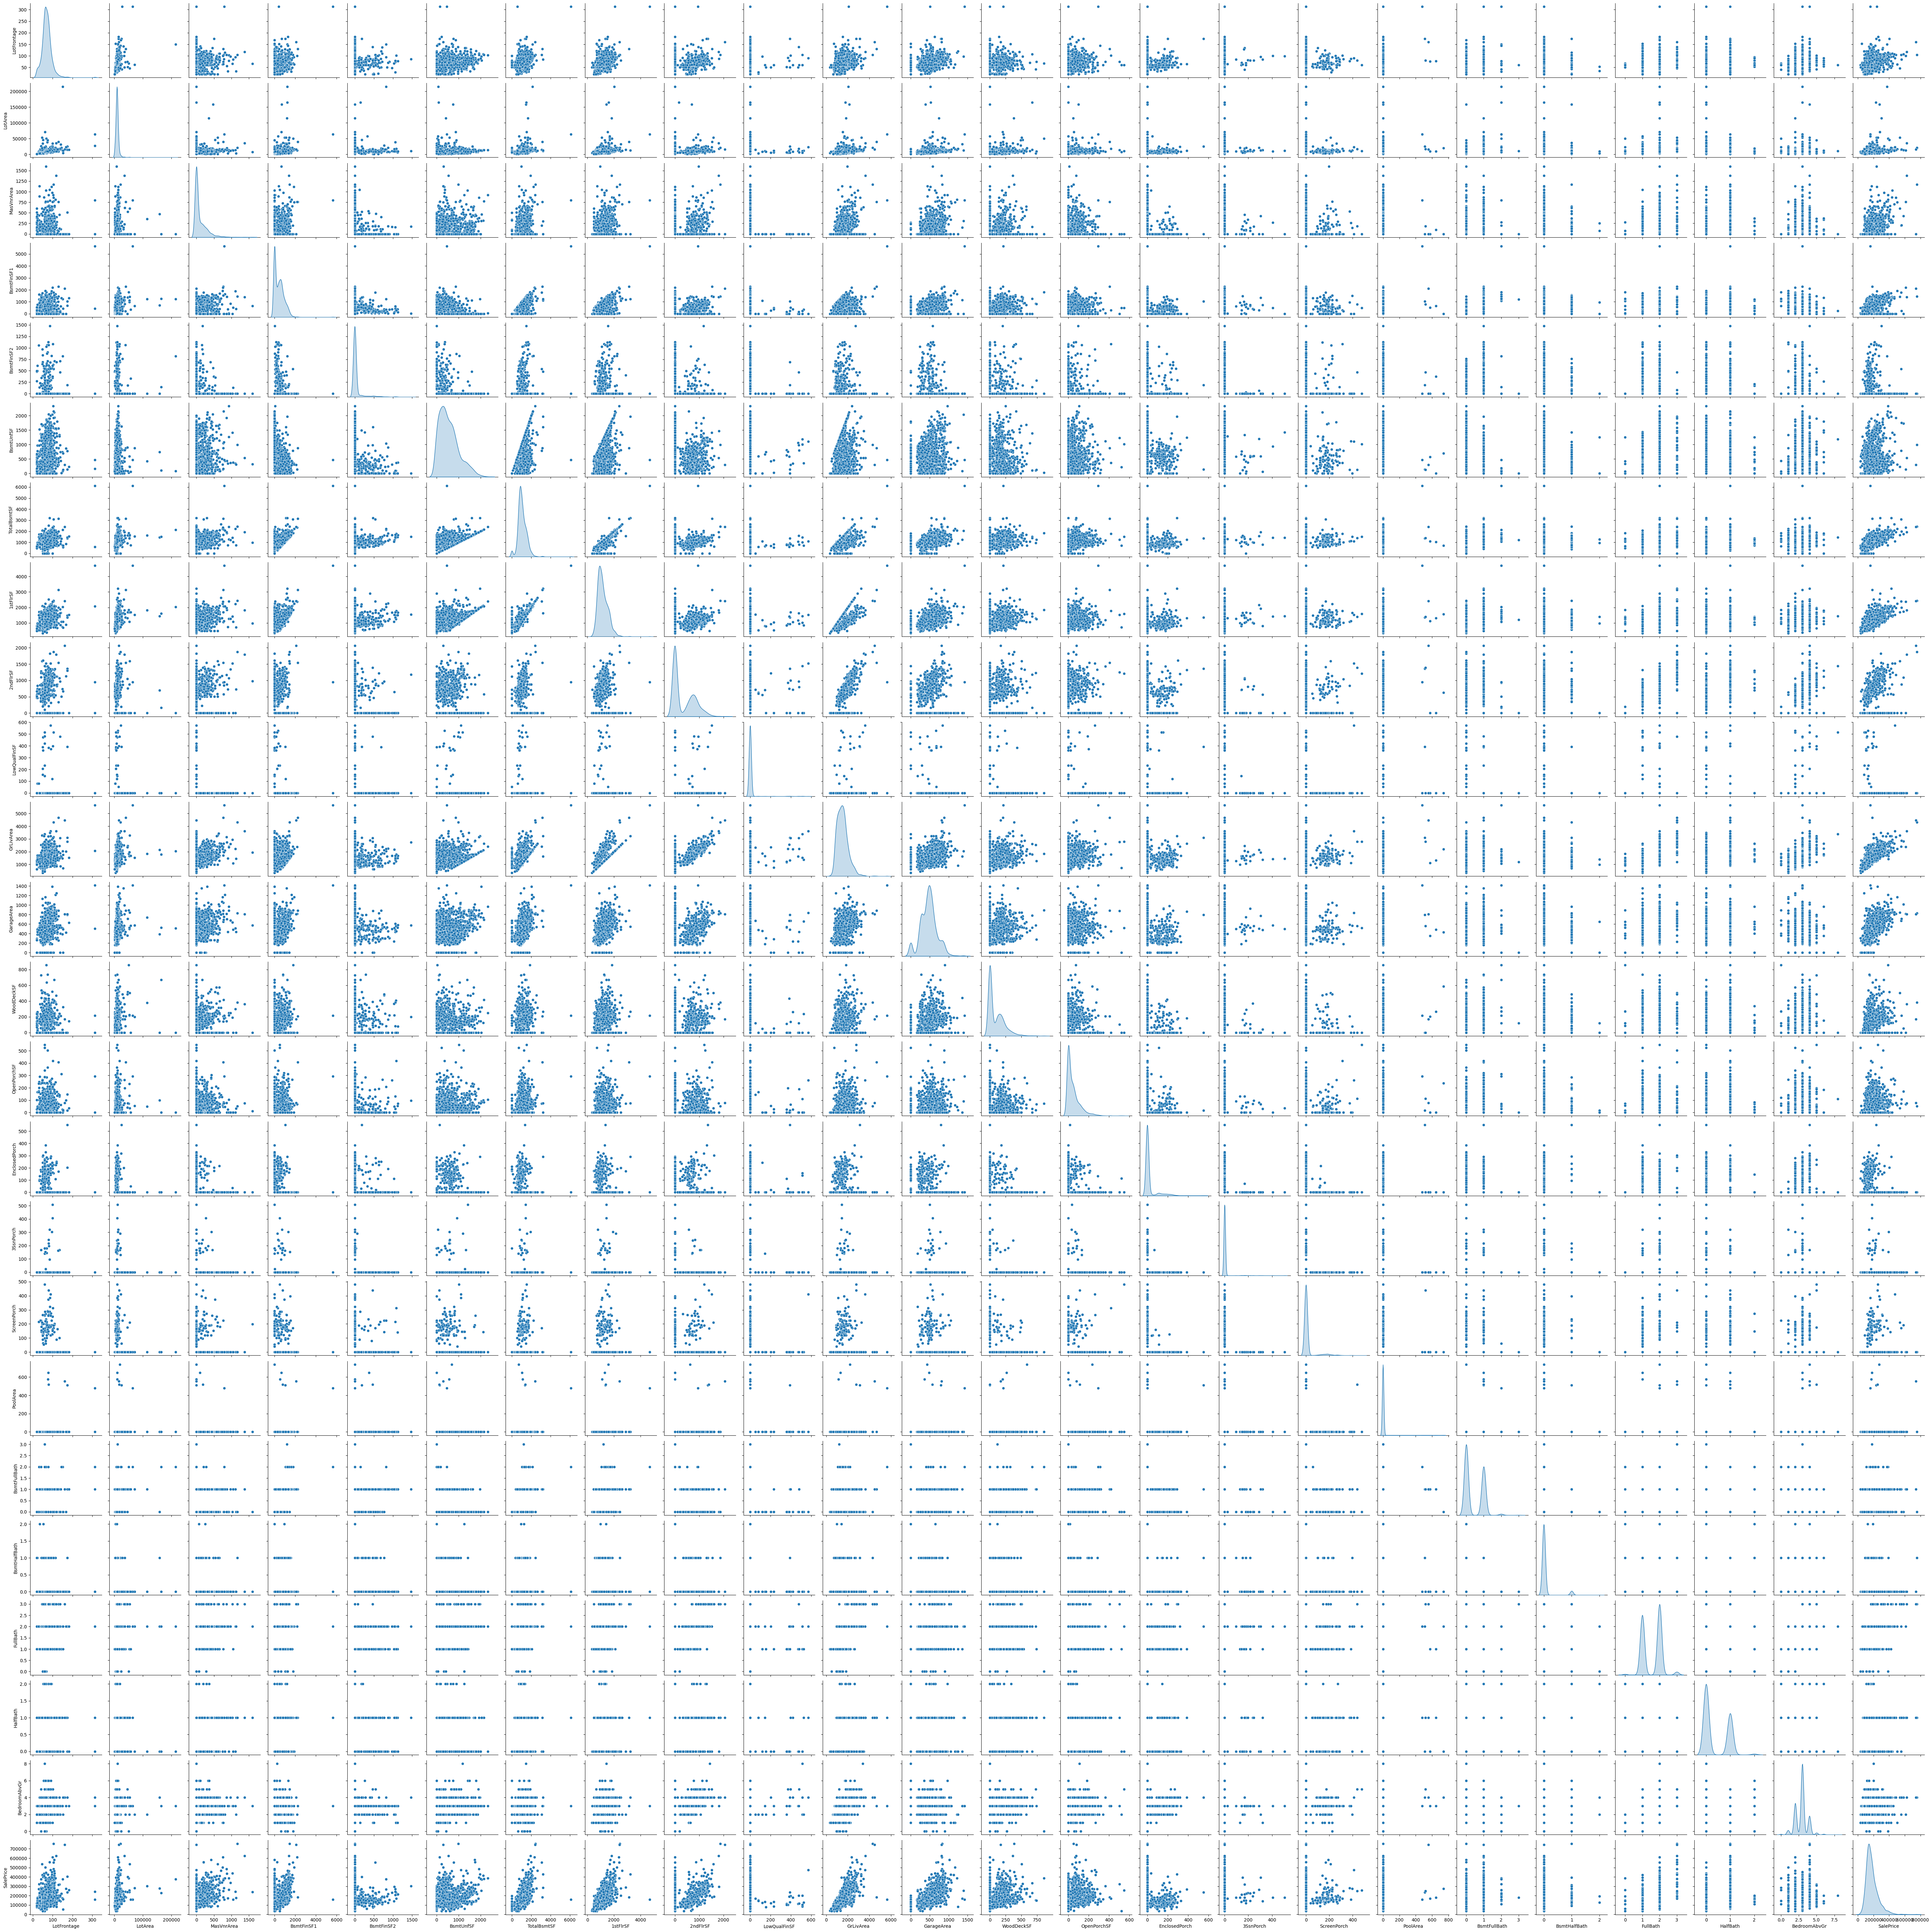

In [24]:
# analysis of the relationship between numerical features
sns.pairplot(house_option, diag_kind = 'kde')

This pairplot clearly highlights that the above-ground living area (`GrLivArea`), total basement area (`TotalBsmtSF`), first floor area (`1stFlrSF`), garage area (`GarageArea`), and number of full bathrooms (`FullBath`) are very strong predictors and positively correlated with SalePrice. These features are likely to be key components in your regression model. On the other hand, many other features, especially those related to additional areas that are rare or of low quality, show very weak correlations with `SalePrice`, indicating that they may be less informative for predicting sale prices. To evaluate the correlation score, use the corr() function.

Text(0.5, 1.0, 'Correlation Matrix ')

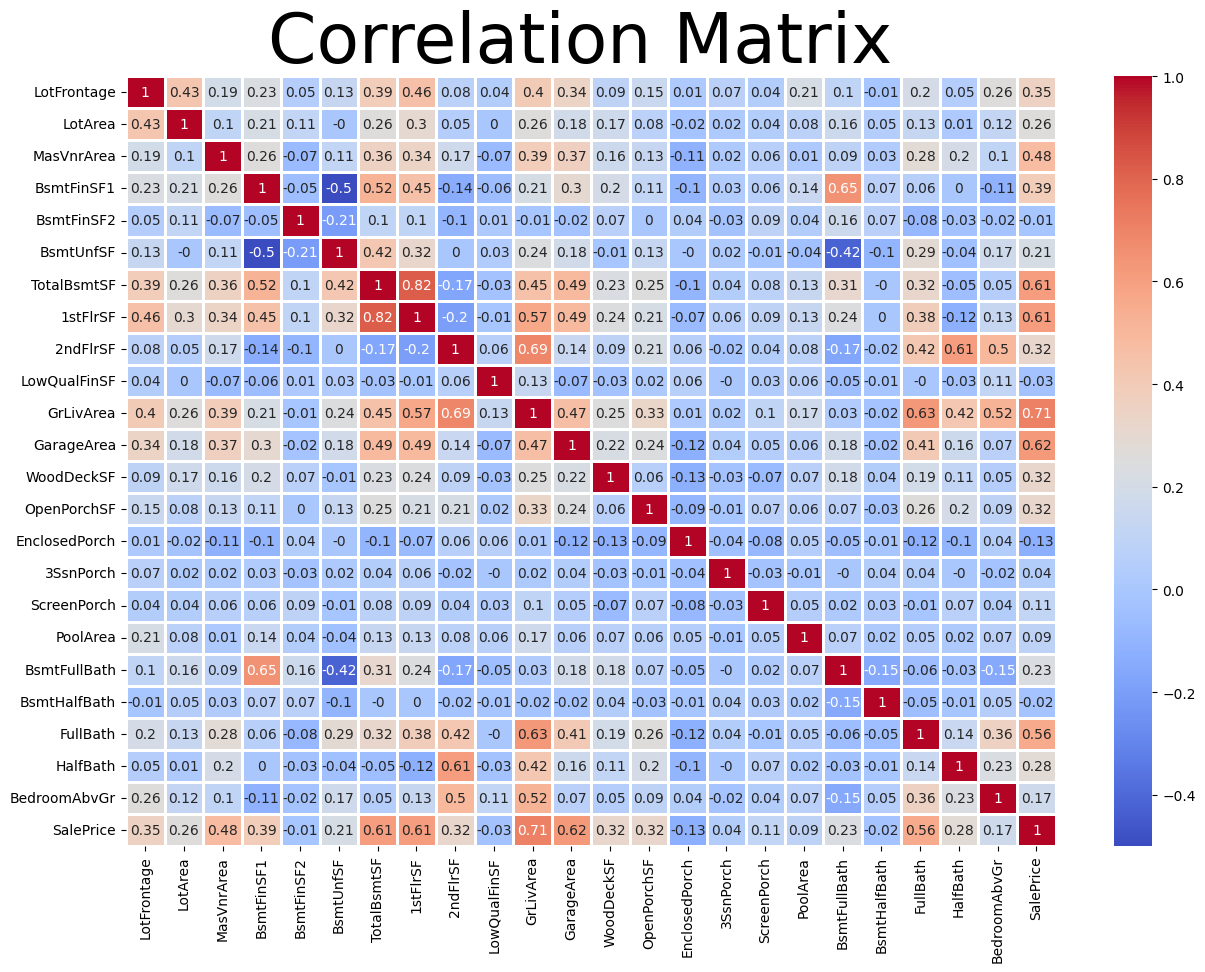

In [25]:
plt.figure(figsize=(15, 10))
correlation_matrix = house_option.corr().round(2)

# To print the value inside the box, use the parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.8, )
plt.title("Correlation Matrix ", size=50)

* Features with very strong correlations (`GrLivArea`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath`, `BedroomAbvGr`) are prime candidates for use in the model because they have a clear relationship with `SalePrice`.
* Features with high multicollinearity (e.g., `1stFlrSF` and `GrLivArea`, or `1stFlrSF` and `TotalBsmtSF`) require attention. Including both features with very high correlations in a linear regression model simultaneously can cause multicollinearity issues, which may make interpreting coefficients difficult or reduce model stability. It may need to choose one or combine them.
* Features with very weak or near-zero correlations with `SalePrice` (`BsmtFinSF2`, `LowQualFinSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `BsmtHalfBath`) are unlikely to contribute significantly to model performance and may be considered for removal to simplify the model and reduce noise.

# Data Preparation

## Delete Irrelevant Columns

In [29]:
# display the desired columns
desired_column = [
    'GrLivArea', 'GarageArea', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'SalePrice'
]

# select only the desired columns
house_option = house[desired_column]

house_option

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  BedroomAbvGr  \
0          1710         548          856       856         2             3   
1          1262         460         1262      1262         2             3   
2          1786         608          920       920         2             3   
3          1717         642          756       961         1             3   
4          2198         836         1145      1145         2             4   
...         ...         ...          ...       ...       ...           ...   
1455       1647         460          953       953         2             3   
1456       2073         500         1542      2073         2             3   
1457       2340         252         1152      1188         2             4   
1458       1078         240         1078      1078         1             2   
1459       1256         276         1256      1256         1             3   

      SalePrice  
0        208500  
1        181500  
2        223500  
3        140000  
4        250000  
...         ...  
1455     175000  
1456     210000  
1457     266500  
1458     142125  
1459     147500  

[1460 rows x 7 columns]

## Handling Missing Values

In [50]:
print("Total missing value: ", house_option.isna().sum())

Total missing value:  GrLivArea       0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64


From the output above, there are no rows with missing values.

In [53]:
house_option.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   GarageArea    1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   FullBath      1460 non-null   int64
 5   BedroomAbvGr  1460 non-null   int64
 6   SalePrice     1460 non-null   int64
dtypes: int64(7)
memory usage: 80.0 KB


## Handling Duplication Issues

In [54]:
print("Total duplication: ", house_option.duplicated().sum())

Total duplication:  1


In [55]:
house_option.drop_duplicates(inplace=True)

/tmp/ipython-input-55-3165791103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_option.drop_duplicates(inplace=True)


In [56]:
house_option.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1459 non-null   int64
 1   GarageArea    1459 non-null   int64
 2   TotalBsmtSF   1459 non-null   int64
 3   1stFlrSF      1459 non-null   int64
 4   FullBath      1459 non-null   int64
 5   BedroomAbvGr  1459 non-null   int64
 6   SalePrice     1459 non-null   int64
dtypes: int64(7)
memory usage: 91.2 KB


## Handling Outliers

<Axes: xlabel='GrLivArea'>

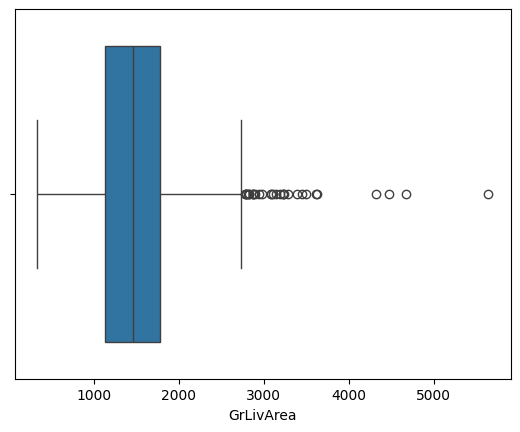

In [57]:
sns.boxplot(x=house_option['GrLivArea'])

<Axes: xlabel='GarageArea'>

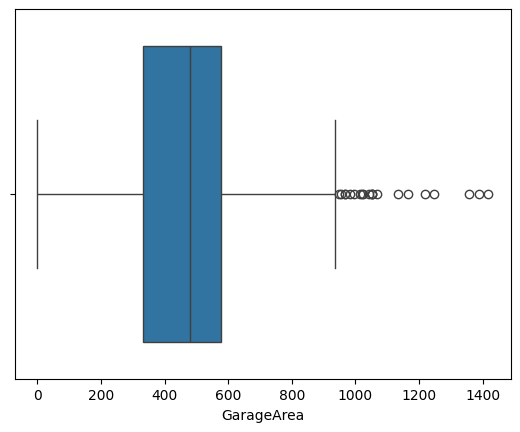

In [58]:
sns.boxplot(x=house_option['GarageArea'])

<Axes: xlabel='TotalBsmtSF'>

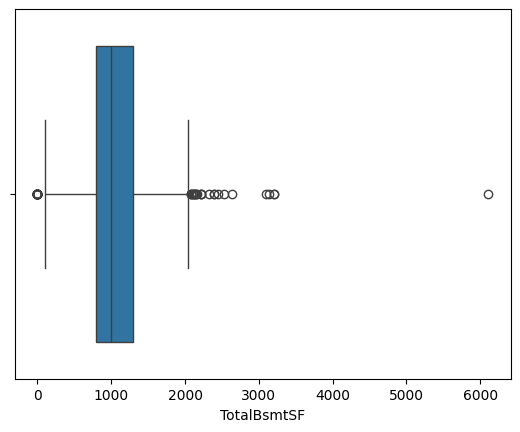

In [59]:
sns.boxplot(x=house_option['TotalBsmtSF'])

<Axes: xlabel='1stFlrSF'>

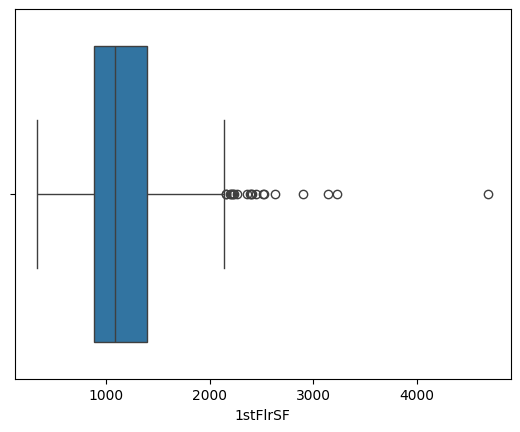

In [60]:
sns.boxplot(x=house_option['1stFlrSF'])

<Axes: xlabel='FullBath'>

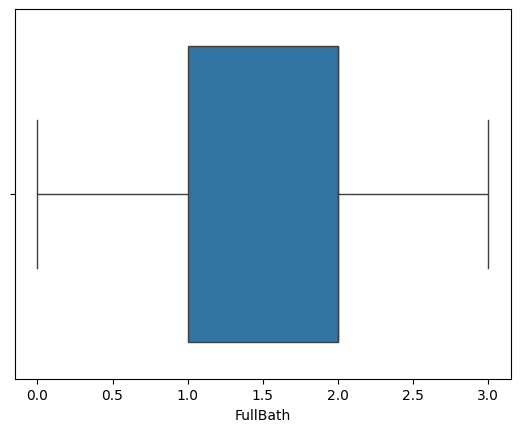

In [61]:
sns.boxplot(x=house_option['FullBath'])

<Axes: xlabel='BedroomAbvGr'>

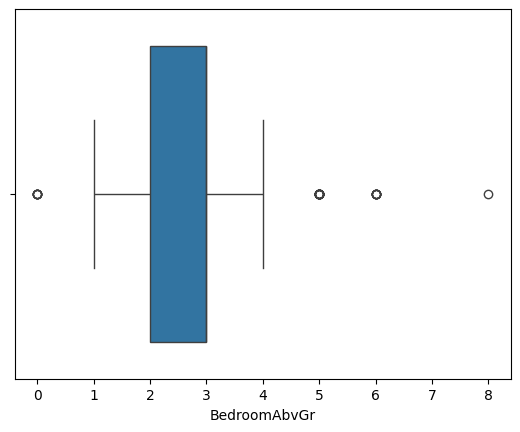

In [62]:
sns.boxplot(x=house_option['BedroomAbvGr'])

<Axes: xlabel='SalePrice'>

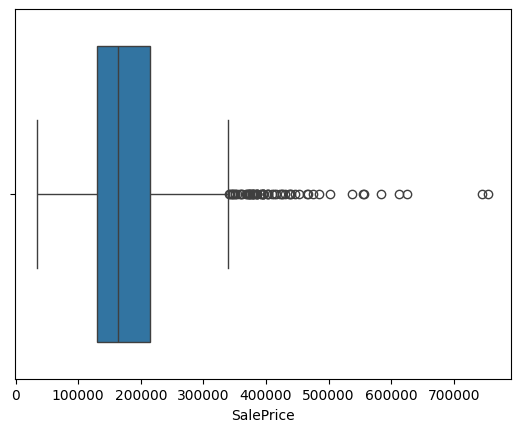

In [63]:
sns.boxplot(x=house_option['SalePrice'])

In [64]:
Q1 = house_option.quantile(0.25)
Q3 = house_option.quantile(0.75)
IQR = Q3 - Q1
house_option = house_option[~((house_option < (Q1 - 1.5 * IQR)) | (house_option > (Q3 + 1.5 * IQR))).any(axis=1)]

In [65]:
house_option.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1296 non-null   int64
 1   GarageArea    1296 non-null   int64
 2   TotalBsmtSF   1296 non-null   int64
 3   1stFlrSF      1296 non-null   int64
 4   FullBath      1296 non-null   int64
 5   BedroomAbvGr  1296 non-null   int64
 6   SalePrice     1296 non-null   int64
dtypes: int64(7)
memory usage: 81.0 KB


Now, the data has been cleaned.

## Train-Test-Split

In [66]:
from sklearn.model_selection import train_test_split

X = house_option.drop(["SalePrice"],axis =1)
y = house_option["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [67]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1296
Total # of sample in train dataset: 1166
Total # of sample in test dataset: 130


## Normalization

In [68]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BedroomAbvGr']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  FullBath  BedroomAbvGr
758    0.151828   -0.084317    -0.872747 -1.101903  0.908690      0.273606
549    1.572547    0.822013    -0.358010 -0.611444  0.908690      1.723721
365   -0.224315    0.060696    -1.093348 -1.370864 -1.003824      0.273606
1106   0.010475    1.360633    -0.364138  1.065609  0.908690      0.273606
917   -0.499834   -0.892246     0.322178  0.391624 -1.003824      0.273606

In [69]:
X_train[numerical_features].describe().round(4)

GrLivArea  GarageArea  TotalBsmtSF   1stFlrSF   FullBath  BedroomAbvGr
count  1166.0000   1166.0000    1166.0000  1166.0000  1166.0000     1166.0000
mean      0.0000      0.0000      -0.0000     0.0000    -0.0000       -0.0000
std       1.0004      1.0004       1.0004     1.0004     1.0004        1.0004
min      -2.2943     -2.3631      -2.5702    -1.9784    -2.9163       -2.6266
25%      -0.7658     -0.7317      -0.7188    -0.7633    -1.0038       -1.1765
50%      -0.0410      0.0711      -0.1757    -0.1558     0.9087        0.2736
75%       0.6256      0.5993       0.6378     0.6764     0.9087        0.2736
max       3.0963      2.4845       2.9755     3.0623     2.8212        1.7237

Now the mean value = 0 and the standard deviation = 1

# Modelling

In [70]:
# Prepare the dataframe for model analysis
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

## K-Nearest Neighbour

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

## AdaBoost

In [74]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluation

In [75]:
# Scale the numerical features in X_test so that they have a mean of 0 and a variance of 1.
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/tmp/ipython-input-75-2093324849.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 5.66304169e-01  6.28595367e-01 -3.44105653e-01  1.54379682e+00
 -9.33476223e-01 -5.40562510e-01 -1.41263929e+00  1.73306623e+00
  1.15327892e+00 -1.20180754e+00  2.19306277e+00  6.86094935e-01
  7.53177764e-01 -1.37430624e+00 -1.50406245e-03  3.68289827e-02
 -9.33476223e-01  1.70431645e+00  1.11099258e-01 -3.24939131e-01
 -1.25691129e+00  8.49010377e-01  4.60888295e-01 -4.42334082e-01
  2.03014733e+00 -6.14832785e-01  9.61613697e-01 -7.65769150e-01
 -3.27334946e-01  1.17484126e+00 -6.98686321e-01 -1.14909960e+00
  4.40164287e-02 -1.13472471e+00  7.77135917e-01 -1.03889210e+00
 -3.51293099e-01 -1.02930884e+00 -7.20248659e-01 -9.11913885e-01
 -7.57743374e-02 -1.30243178e+00 -1.16347449e+00 -1.71930365e+00
 -7.68164965e-01  1.74744112e+00  2.81202145e-01  6.57345151e-01
  5.13596232e-01  2.57878904e+00 -9.71809268e-01 -9.35872038e-0

In [76]:
# Create a variable mse containing the mse values for the train and test data for each algorithm.
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Create a dictionary for each algorithm used.
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Calculate the Mean Squared Error for each algorithm on the train and test data
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Call mse
mse

train            test
KNN       685740.382568   891758.809631
RF        129584.317982    825052.50352
Boosting  953998.050767  1110614.642993

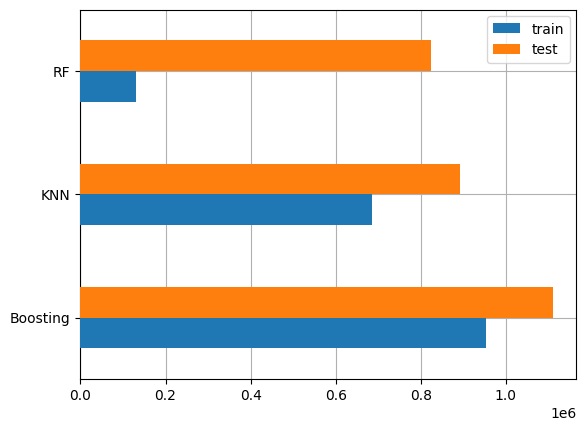

In [77]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

The Random Forest (RF) model provides the smallest error value. Meanwhile, the model with the Boosting algorithm has the largest error. Therefore, we will choose the Random Forest (RF) model as the best model for predicting house prices.

In [78]:
prediction = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(1)

pd.DataFrame(pred_dict)


y_true  prediction_KNN  prediction_RF  prediction_Boosting
563  185000        167020.0       170425.6             208246.8

It appears that predictions using Random Forest (RF) provide the closest results.

# Save Model

In [80]:
import joblib

# Save the Random Forest model since it performed the best
joblib.dump(RF, 'houseprice_model.joblib')

print("Model saved as houseprice_model.joblib")

Model saved as houseprice_model.joblib
